In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files

uploaded = files.upload()

Saving USArrests.csv to USArrests.csv


In [3]:
df=pd.read_csv("./USArrests.csv", index_col=0)
df.head()

#Amreikanın eyaletlerini suç istatistiklerine göre kümelere ayırıyoruz

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.isnull().sum()  #eksik gözlem yok

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.5+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89b28d7c88>,
      dtype=object)

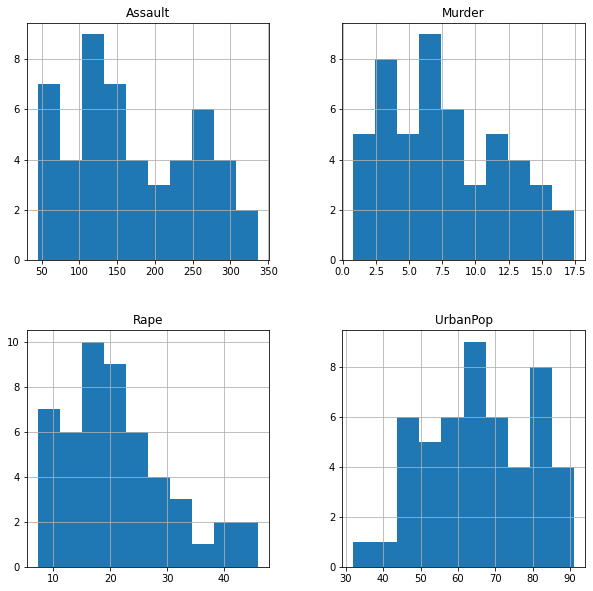

In [8]:
df.hist(figsize=(10,10))

In [0]:
kmeans=KMeans(n_clusters=4) #4 kümeden oluşacak şekilde

In [10]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
k_fit=kmeans.fit(df)

In [12]:
k_fit.n_clusters

4

In [13]:
k_fit.cluster_centers_  #4 adet kümenin merkezleridir. gözlem birimleri.

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [14]:
k_fit.labels_

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0], dtype=int32)

**Kümelerin Görselleştirilmesi**

In [0]:
k_means=KMeans(n_clusters=2).fit(df)

In [0]:
kumeler=k_means.labels_

In [17]:
kumeler

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

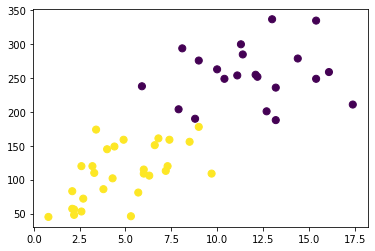

In [20]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis");

In [0]:
merkezler=k_means.cluster_centers_

In [22]:
merkezler

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

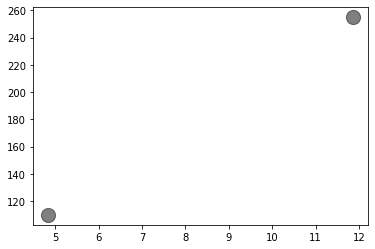

In [23]:
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5)

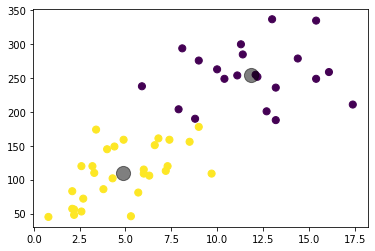

In [25]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=kumeler, s=50, cmap="viridis");
plt.scatter(merkezler[:,0], merkezler[:,1], c="black", s=200, alpha=0.5); #kümelerin merkezleri gösterilmiş oluyor
#çok sayıda eyalet vardı bunlar iki tane değişken göz önünde bulundurulduğunda birbirlerine olan yakınlıklarına yani merkzlere olan uzaklarına göre belirlenmiş oldu.